TASK_4_EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]  # Rename the columns
df.columns = ['spam/ham', 'sms']

In [ ]:
df.head()

,spam/ham,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,spam/ham,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.describe()

,spam/ham,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   spam/ham  5572 non-null   object
 1   sms       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.ndim

2

In [ ]:
df.isna().sum()

spam/ham    0
sms         0
dtype: int64

In [ ]:
df.isnull

<bound method DataFrame.isnull of      spam/ham                                                sms
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [ ]:
df['spam/ham'].value_counts()

ham     4825
spam     747
Name: spam/ham, dtype: int64

Data Preprocessing

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['sms'])
y = df['spam/ham']

In [ ]:
X

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [ ]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: spam/ham, Length: 5572, dtype: object

Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Train the Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9497757847533632


Confusion Matrix

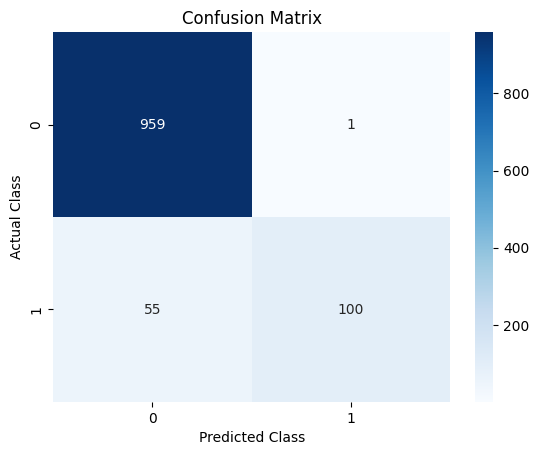

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()